# The challenge
Your aim is to use the mobile characteristics data (battery capacity, resolution of the front camera, mobile mass, etc.) to predict the price range for each mobile in the test data.

# The data
To take a look at the competition data, click on the [Data tab](https://www.kaggle.com/c/dru-kaggle-intro/data) at the top of the competition page.
There are three files: 
1. **train_mobile.csv**;
2. **test_mobile.csv**;
3. **sample_submission.csv**.

# The Notebook

You can create a Kaggle Notebook where you'll store all of your code or take a copy of this one. So you can use Kaggle Notebooks without having to install anything on your computer.

If you want to create your notebook, you need to go to [the Code tab](https://www.kaggle.com/c/dru-kaggle-intro/code) on the competition page. Then, click on "New Notebook".

![](https://dru.fra1.digitaloceanspaces.com/DS_Fundamentals/static/06_practical_ml/kaggle/dru_kaggle_intro/the_code_tab.png)

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

This shows you where the competition data is stored so that you can load the files into the notebook.

# Get Familiar With Your Data

The first step in any machine learning project is to familiarise yourself with the data. Let's do this by using Pandas library.

In [5]:
# loading the data
# read and store data in **train** and **test** DataFrames
train = pd.read_csv('D:/kaggle/train_mobile.csv')
test = pd.read_csv('D:/kaggle/test_mobile.csv')

# let's take a look at train data
train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1023,yes,0.6,yes,0,yes,53,0.8,146,3,...,905,1988,2633,17,3.0,8,yes,yes,no,2
1,565,yes,0.6,yes,2,yes,41,1.0,155,5,...,1263,1716,2605,11,2.0,10,yes,yes,no,2
2,617,yes,2.6,no,0,no,10,0.9,141,6,...,1216,1786,2771,16,8.0,12,yes,no,no,2
3,1823,yes,1.3,no,13,yes,44,0.7,151,2,...,1208,1212,1413,8,2.0,16,yes,yes,no,1
4,1823,no,1.8,no,4,yes,10,0.9,149,8,...,381,1018,3222,13,8.0,19,yes,no,yes,3


So the train dataset contains 21 columns.

# Exploring data

Exploring data is a step that allows us to understand the contents of the data, starting from the distribution, frequency, correlation and more.
> `describe()` is used to display summary statistics for the numeric attributes of the dataset:

In [6]:
# print a summary of the train data
train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,1500.000000,1450.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1388.000000,1500.000000,1500.000000
mean,1238.160000,1.620621,4.324000,32.130000,0.601467,150.330000,4.568667,9.917333,642.916667,1255.106000,2123.830000,12.364667,5.734150,12.036667,1.500000
std,439.103833,0.816908,4.370937,18.077287,0.290150,35.456121,2.308716,6.074902,443.188796,433.117891,1091.421832,4.181787,4.307478,5.483615,1.127319
min,503.000000,0.600000,0.000000,2.000000,0.200000,90.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,3.000000,0.000000
25%,852.750000,0.800000,1.000000,16.000000,0.300000,119.000000,3.000000,5.000000,281.750000,880.500000,1186.750000,9.000000,2.000000,7.000000,0.000000
50%,1221.000000,1.600000,3.000000,32.000000,0.600000,150.000000,5.000000,10.000000,561.500000,1250.500000,2135.500000,12.000000,5.000000,12.000000,1.000000
75%,1608.250000,2.300000,7.000000,48.000000,0.900000,181.000000,7.000000,15.000000,938.000000,1642.250000,3079.250000,16.000000,9.000000,17.000000,3.000000
max,1998.000000,3.100000,19.000000,64.000000,1.100000,210.000000,8.000000,20.000000,1960.000000,1998.000000,4000.000000,19.000000,18.000000,21.000000,3.000000


This dataset has categorical features, so we need to use data transformation because some dataset features are not numeric.
> `info()` is used to get a concise summary of the data:

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1500 non-null   int64  
 1   blue           1500 non-null   object 
 2   clock_speed    1450 non-null   float64
 3   dual_sim       1460 non-null   object 
 4   fc             1500 non-null   int64  
 5   four_g         1455 non-null   object 
 6   int_memory     1500 non-null   int64  
 7   m_dep          1500 non-null   float64
 8   mobile_wt      1500 non-null   int64  
 9   n_cores        1500 non-null   int64  
 10  pc             1500 non-null   int64  
 11  px_height      1500 non-null   int64  
 12  px_width       1500 non-null   int64  
 13  ram            1500 non-null   int64  
 14  sc_h           1500 non-null   int64  
 15  sc_w           1388 non-null   float64
 16  talk_time      1500 non-null   int64  
 17  three_g        1500 non-null   object 
 18  touch_sc

Looking at the *Non-Null Count* of each column, it's evident that train data has some missing values in `clock_speed`, `sc_w`, `dual_sim`, and `four_g` columns. Also, we see that columns `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, and `wifi` have categorical values.

In [8]:
# create a list with categorical features
cat_features_list = train.select_dtypes(include='object').columns.to_list()
cat_features_list

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

These columns only accept two unique values, "no" and "yes", so we can replace them with bool values 0 and 1, where 0 is "no", and 1 is "yes".

> Converting categorical variables into numeric variables:

In [9]:
columns_to_encode = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in columns_to_encode:
    
    # encode columns for both train and test sets
    train[f'{col}'] = train[f'{col}'].apply(lambda x: 1 if x == 'yes' else 0)
    test[f'{col}'] = test[f'{col}'].apply(lambda x: 1 if x == 'yes' else 0)

The data have missing values in columns `clock_speed`, `sc_w`, `dual_sim` and `four_g` that can cause inaccurate analysis. There are many ways to compensate for missing values in a dataset. Frequently used methods:
* **mean** - works well with small numerical features, but doesn’t factor in the correlations between features and is not very accurate, affecting the variance of the resulting dataset; 
* **mode** - works well with categorical features. It does not take into account the correlations and can introduce bias in the data by unwantedly assigning more labels to a specific category;
* **interpolation** - it initiates a function that suits your data. This function can then be used to extrapolate values for missing data. It is more computationally expensive than the two methods above.

> Below show the process of handling some missing values with the mean and mode of the column using the `fillna()` method:

In [10]:
train['clock_speed'].fillna(train['clock_speed'].mean(), inplace=True)
train['sc_w'].fillna(train['sc_w'].mean(), inplace=True)

train['dual_sim'].fillna(train['dual_sim'].mode(), inplace=True)
train['four_g'].fillna(train['four_g'].mode(), inplace=True)

C:\Users\Dmytro\AppData\Local\Temp\ipykernel_14932\2921024123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['clock_speed'].fillna(train['clock_speed'].mean(), inplace=True)
C:\Users\Dmytro\AppData\Local\Temp\ipykernel_14932\2921024123.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

# Finding relationships


Now let's take a look at the correlation matrix for numerical features to see how the columns are related:

<function matplotlib.pyplot.show(close=None, block=None)>

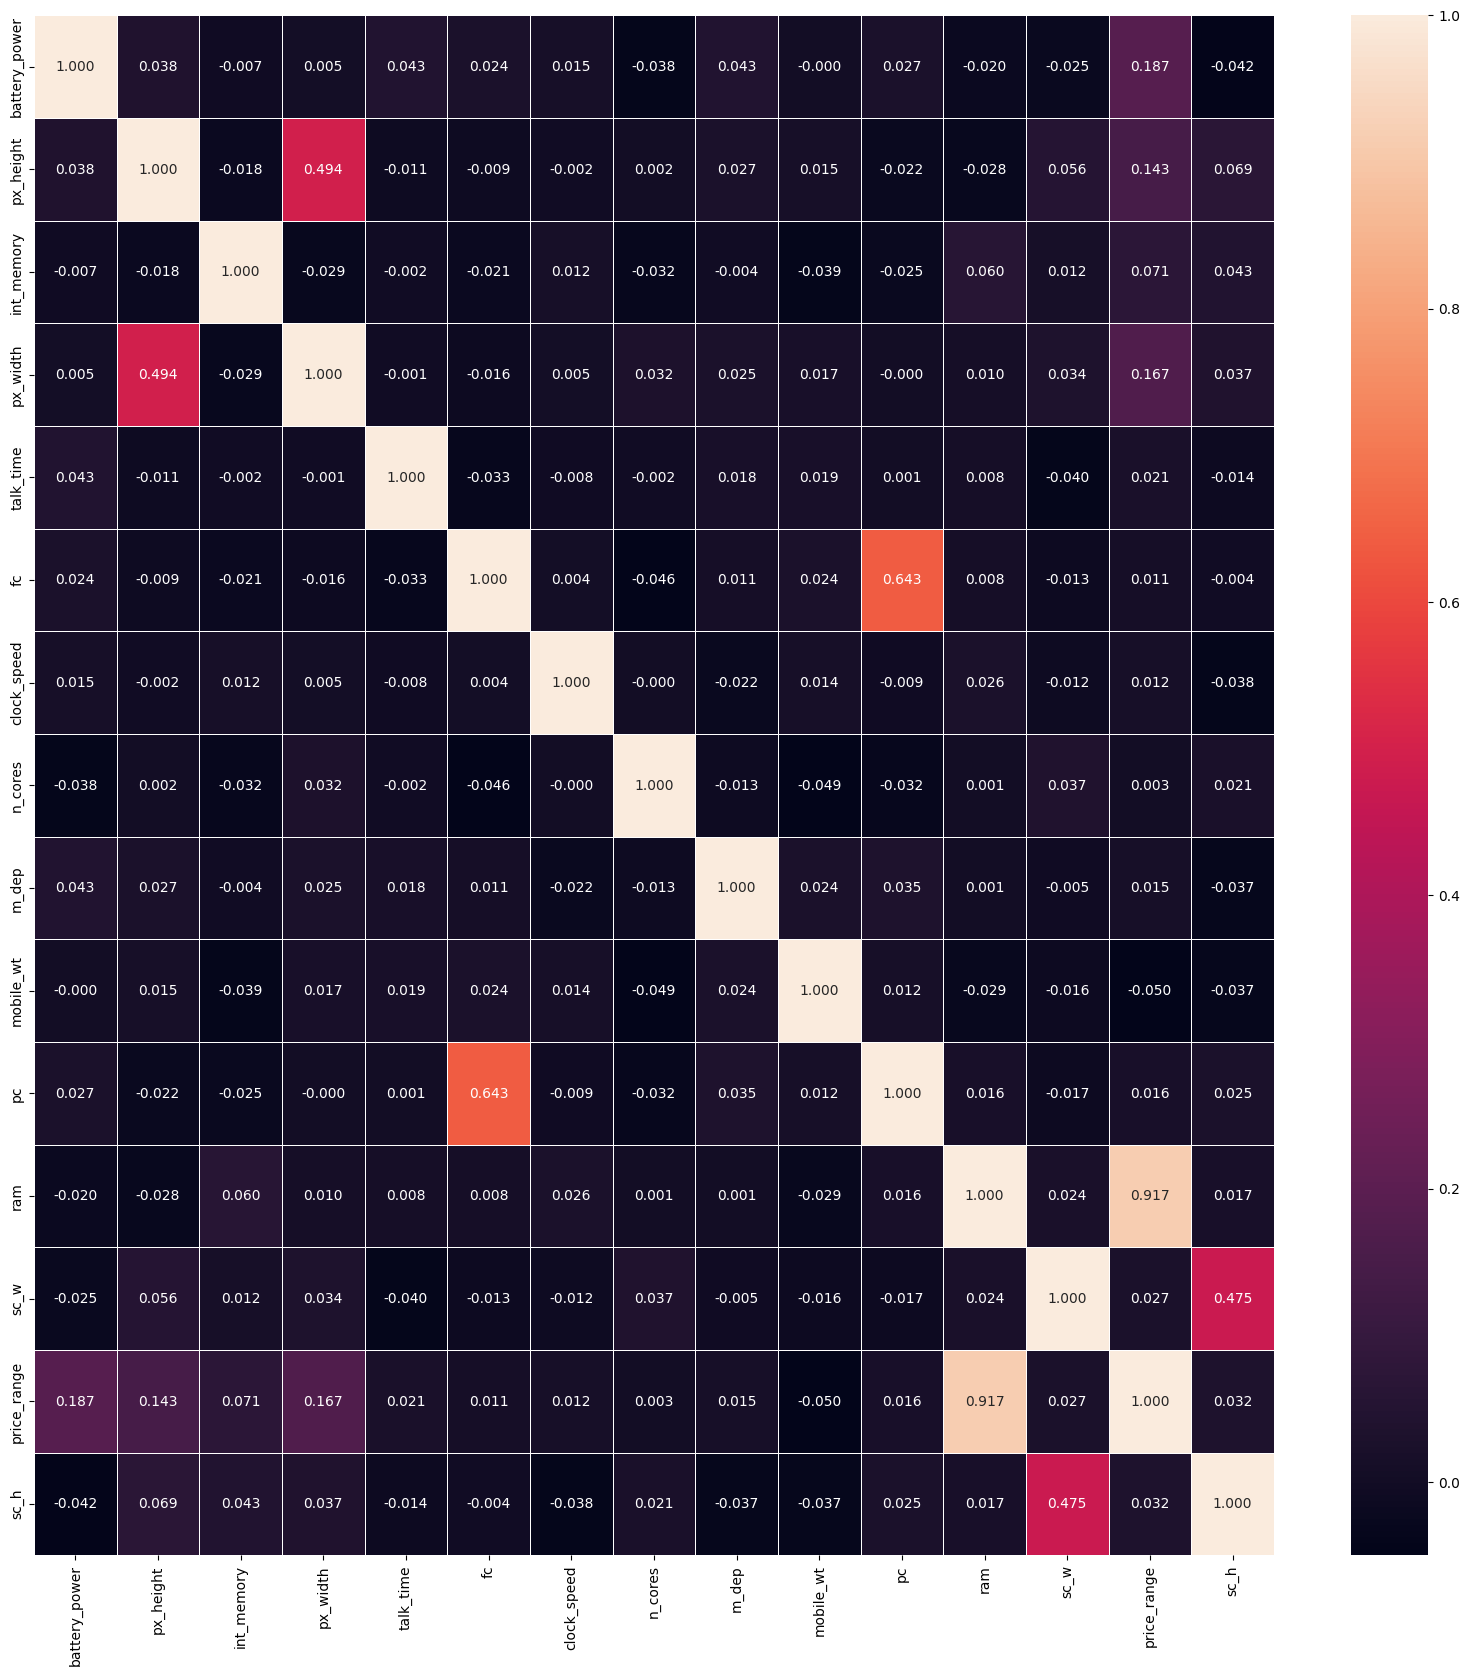

In [11]:
# correlation map
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat_features_list = list(set(train.columns) - set(columns_to_encode))

corr_mat = train[corr_mat_features_list].corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_mat, annot=True, linewidths=.5, fmt='.3f', ax=ax)
plt.show

What we see:
* Our `price_range` has a strong correlation with `ram`;
* `pc` has a positive correlation with `fc`;
* `px_weight` and `px_height` are positive correlated;
* `sc_w` and `sc_h` are positively correlated.

In [12]:
# let's sort price_range correlation
corr_mat.sort_values(by=["price_range"], ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917459
battery_power    0.186965
px_width         0.167494
px_height        0.143185
int_memory       0.070659
sc_h             0.032477
sc_w             0.027008
talk_time        0.020666
pc               0.016073
m_dep            0.014685
clock_speed      0.012198
fc               0.010966
n_cores          0.002691
mobile_wt       -0.049929
Name: price_range, dtype: float64

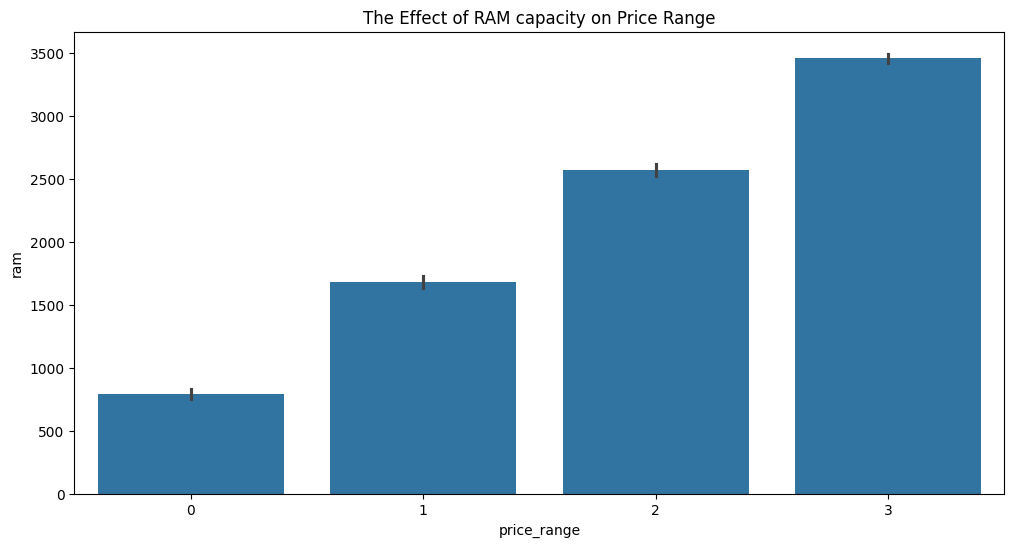

In [13]:
# how ram affects price_range
plt.figure(figsize=(12,6))
plt.title('The Effect of RAM capacity on Price Range')
sns.barplot(x = 'price_range',y = 'ram',data = train, )
plt.show()

> The more RAM, the more expensive the phone.

# Checking outliers
Outliers can markedly affect our models and can be a valuable source of information, providing us insights into specific behaviours.

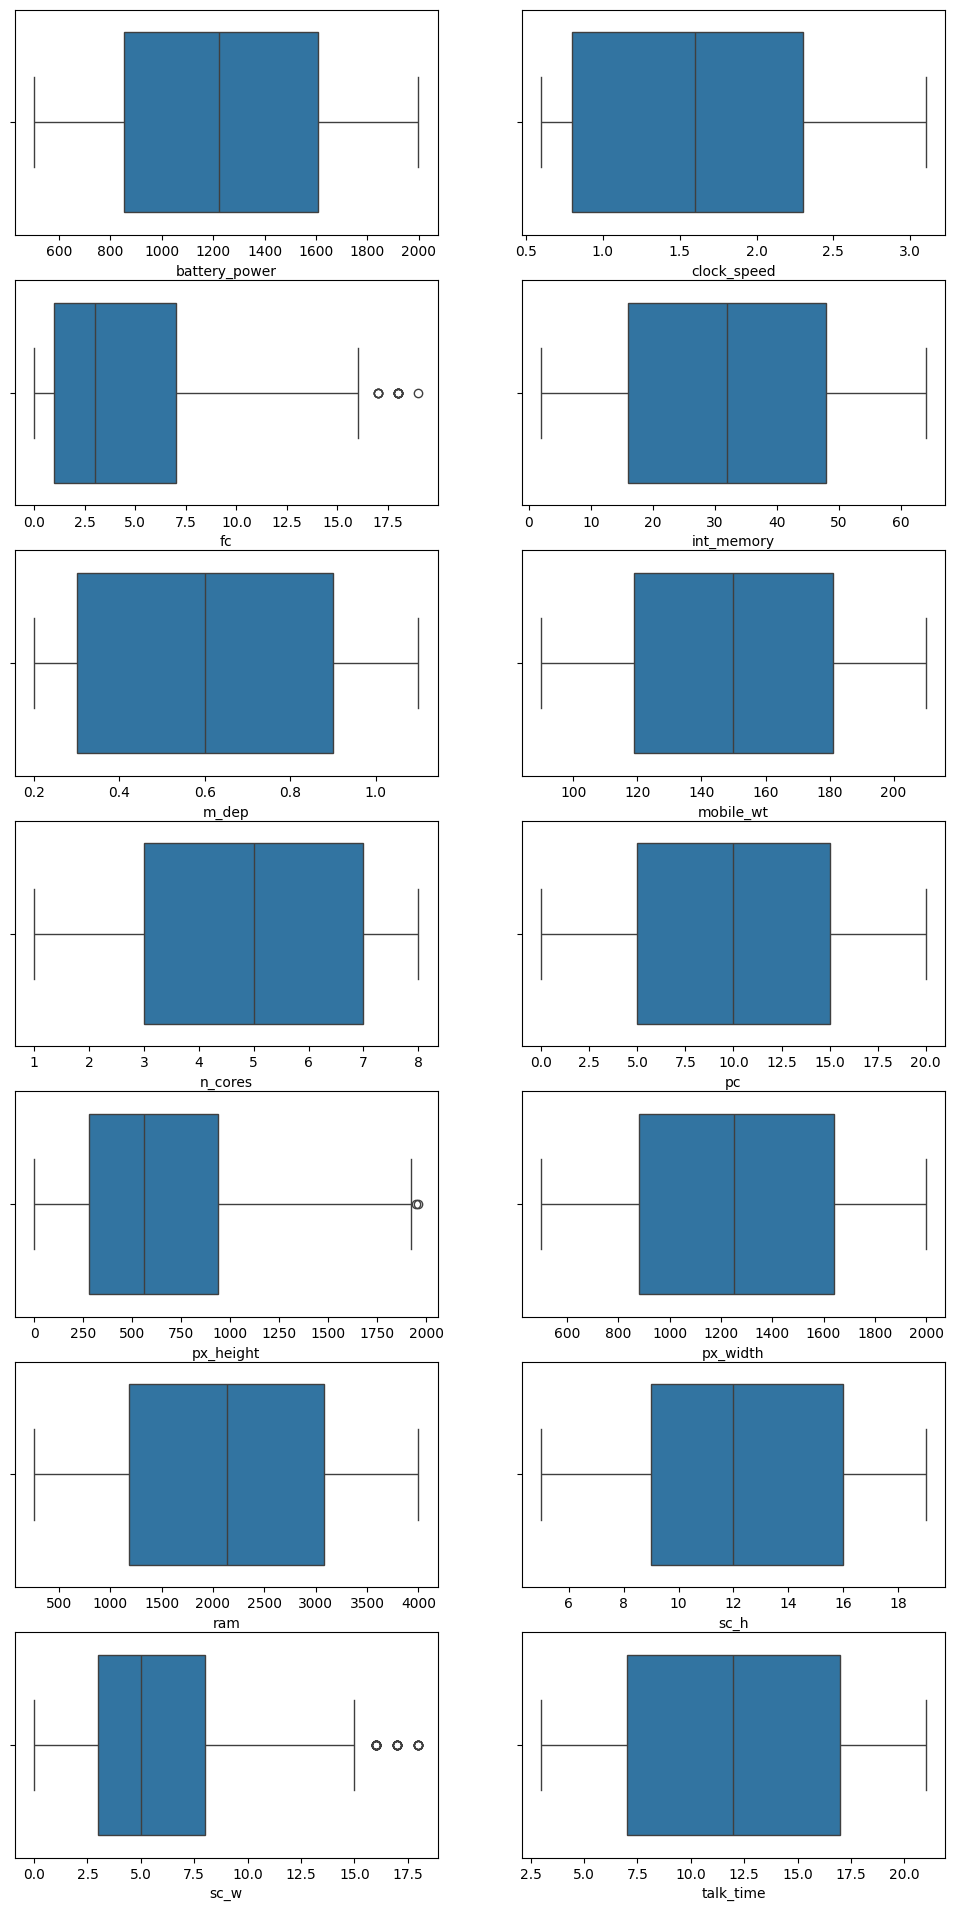

In [14]:
# outlier analysis of non-categorical data
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,24))

features_to_check_outliers = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for i, col in enumerate(features_to_check_outliers):
    sns.boxplot(x = train[f'{col}'], ax = ax[int(i % len(features_to_check_outliers) / 2) , i % 2])

There are a few outliers in `fc` and `px_height` only. *If we were solving a regression problem, then we would need to pay special attention to outliers in the data.*

# Standardization

In [15]:
# feature scaling for continuous variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

numerical_features_list = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

train[numerical_features_list]= sc.fit_transform(train[numerical_features_list])
test[numerical_features_list] = sc.fit_transform(test[numerical_features_list])

# Splitting the training and testing dataset

In [16]:
from sklearn.model_selection import train_test_split

# splitting of data
train_df = train.copy()

X = train_df.drop('price_range',axis=1)
y = train_df['price_range']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

# Building Model

You will use the scikit-learn library to create your models. Scikit-learn is easily the most popular library for modelling data types typically stored in DataFrames.

The steps to building and using a model are:

1. **Defining** the type of model.
2. **Fit**: Capture patterns from provided data.
3. **Predict**: Predicting target value.
4. **Evaluate**: Determine how accurate the model's predictions are.

Below is an example of defining a KNeighbours Classifier model with scikit-learn and fitting it with the features and target variable.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# defining model
classifier = KNeighborsClassifier()

# fit the model
classifier.fit(X_train, y_train)

# predicting X_val
y_pred_knn = classifier.predict(X_val)

# evaluating
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69        76
           1       0.39      0.39      0.39        74
           2       0.52      0.48      0.50        73
           3       0.79      0.73      0.76        77

    accuracy                           0.59       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.59      0.59      0.59       300



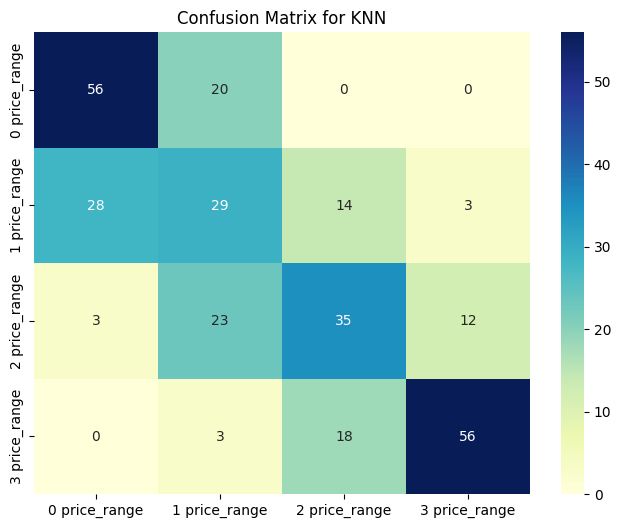

In [18]:
from sklearn.metrics import confusion_matrix

# visualizing the confusion matrix
cm = confusion_matrix(y_val, y_pred_knn)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data = cm, 
                         columns=["0 price_range", "1 price_range", "2 price_range", "3 price_range"], 
                         index=["0 price_range", "1 price_range", "2 price_range", "3 price_range"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix for KNN")
plt.show()

As you can see, the classification accuracy is too poor. Let's try another classification model:

In [19]:
from sklearn.neural_network import MLPClassifier

# defining model
mlp = MLPClassifier(learning_rate_init=0.005, alpha=1e-3, tol=1e-1, 
                    early_stopping=True, validation_fraction=0.2, random_state=42)

# fit the model
mlp.fit(X_train,y_train)

# predicting X_val
y_pred_mlp = mlp.predict(X_val)

# evaluating
print(classification_report(y_val, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        76
           1       0.79      0.85      0.82        74
           2       0.88      0.78      0.83        73
           3       0.87      0.96      0.91        77

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



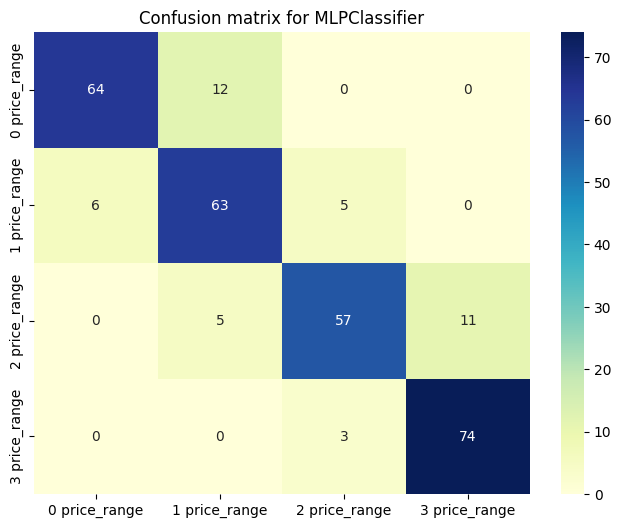

In [20]:
# visualizing the confusion matrix
cm = confusion_matrix(y_val, y_pred_mlp)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data = cm, 
                         columns=["0 price_range", "1 price_range", "2 price_range", "3 price_range"], 
                         index=["0 price_range", "1 price_range", "2 price_range", "3 price_range"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion matrix for MLPClassifier")
plt.show()

The accuracy has improved, but it is still not the best result. Your task will be to find and choose the best model for the given dataset. Try to check the accuracy of the classifiers you are familiar with or try to improve the ones already mentioned.

# Using best trained algorithm

In [ ]:
# remove 'index' column
test_df = test.copy()
test_df = test_df.drop('index', axis=1)

In [ ]:
# prediction on the test set
predicted_price_range = mlp.predict(test_df)
predicted_price_range

# Submission
Our goal: is to find patterns in **train_mobile.csv** that help us predict "price_range" for each mobile in **test_mobile.csv**.

In [ ]:
# creating submission file
submission = pd.DataFrame({'index': test['index'],
                           'price_range': predicted_price_range})
submission.to_csv('submission.csv', index=False)

* Click on the "**Save Version**" button in the top right corner of your notebook.
* Select "**Save and Run All**" option. If it is not, then click on the "**Save**" button.
* This generates a window in the bottom left corner of the notebook. After it has finished running, click on the number to the right of the "**Save Version**" button. This pulls up a list of versions on the right of the screen. Click on the ellipsis (...) to the right of the most recent version, and select **Open in Viewer**. This brings you into view mode on the same page. You will need to scroll down to get back to these instructions.
* Click on the **Data** tab on the right of the screen. Then, click on the "**Submit**" button to submit your results.
![image.png](https://dru.fra1.digitaloceanspaces.com/DS_Fundamentals/static/06_practical_ml/kaggle/dru_kaggle_intro/submission.png
)


># Your turn!

>Now try to improve the quality of price_range classification for this dataset [yourself](https://www.kaggle.com/c/dru-kaggle-intro/code)💪
